In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM


In [2]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 10000)

In [3]:
np.unique(y_train)

array([0, 1], dtype=int64)

In [4]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [5]:
max_length = 500
x_train = pad_sequences(x_train, maxlen = max_length)
x_test = pad_sequences(x_test, maxlen = max_length)

In [6]:
embedding_dim = 50
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=embedding_dim, input_length=max_length))
model.add(LSTM(units=64))
model.add(Dense(units=1, activation='sigmoid'))

In [7]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
history = model.fit(x_train, y_train, epochs = 5, validation_split = 0.2)

Epoch 1/5
625/625 [==============================] - 246s 388ms/step - loss: 0.4368 - accuracy: 0.7865 - val_loss: 0.3081 - val_accuracy: 0.8786
Epoch 2/5
625/625 [==============================] - 241s 385ms/step - loss: 0.2798 - accuracy: 0.8856 - val_loss: 0.3835 - val_accuracy: 0.8394
Epoch 3/5
625/625 [==============================] - 247s 396ms/step - loss: 0.1953 - accuracy: 0.9265 - val_loss: 0.3570 - val_accuracy: 0.8780
Epoch 4/5
625/625 [==============================] - 247s 395ms/step - loss: 0.1365 - accuracy: 0.9518 - val_loss: 0.3608 - val_accuracy: 0.8642
Epoch 5/5
625/625 [==============================] - 239s 382ms/step - loss: 0.1122 - accuracy: 0.9602 - val_loss: 0.4076 - val_accuracy: 0.8758


In [9]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

782/782 [==============================] - 104s 133ms/step - loss: 0.4372 - accuracy: 0.8592
Test Loss: 0.43716296553611755
Test Accuracy: 0.8592399954795837


In [10]:
mse_neural, mae_neural = model.evaluate(x_test, y_test)
print('MSE from neural net: ', mse_neural)
print('MAE from neural net: ', mae_neural)

782/782 [==============================] - 109s 139ms/step - loss: 0.4372 - accuracy: 0.8592
MSE from neural net:  0.43716296553611755
MAE from neural net:  0.8592399954795837


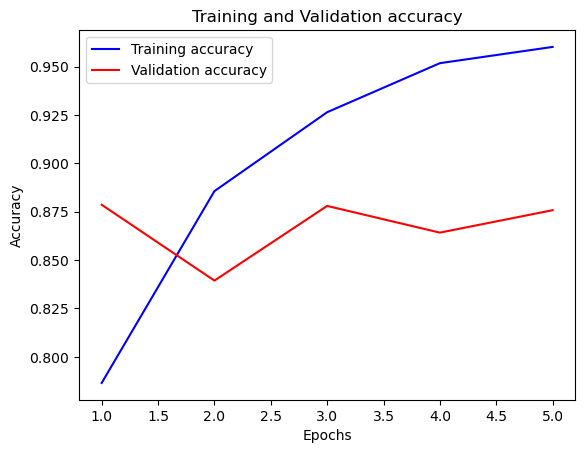

In [12]:
acc= history.history['accuracy']
val_acc =  history.history['val_accuracy']
epochs = range(1, len(acc) +1)
plt.plot(epochs, acc, 'b', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
predictions = model.predict(x_test)

782/782 [==============================] - 104s 132ms/step


In [13]:
print(predictions)

[[0.04070532]
 [0.99968266]
 [0.04315401]
 ...
 [0.0103432 ]
 [0.00114622]
 [0.23194423]]


In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_binary = (predictions >= 0.5).astype(int)
y_test_binary = y_test.astype(int)

accuracy = accuracy_score(y_test_binary, y_pred_binary)
precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.85924
Precision: 0.8773846541726196
Recall: 0.8352
F1 Score: 0.8557727775728513
